In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



from sklearn.datasets import fetch_california_housing
method = "komma"
scores_ges= []

for j in range (1,100):
    
    california_housing = fetch_california_housing(as_frame=True)
    csv_file =california_housing.frame
    #percentile of Data to be randomized [%]
    pct = j
    #method of randomization
    """ possible values:
            "vertauschen"   - die ausgewählte Menge an Daten untereinander vertauschen
            "komma"         - Kommastelle verschieben
            "zufaellig"      - für die ausgewählte Menge werden zufällige Werte 
                          ermittelt, welche in Wertebereich des Datensatzes liegen
    """


    """Dateipfad in dem die veränderte Excel-Datei gespeichert wird
         Dabei nur den Ordner angeben, der Name der Datei ergibt sich aus den 
         gewählten Parametern.
    """
    #Number of entries
    noe = len(csv_file)
    exportCSV = csv_file
    if method == "zufaellig":
        changedElements = [[],[]]
        value_range = [np.min(csv_file["MedHouseVal"]),np.max(csv_file["MedHouseVal"])] 
    
        while len(changedElements[0])<= int(noe*pct/100):
                index = int(np.random.rand()*noe)
                if index not in changedElements[0]:
                    changedElements[0].append(index)
                    mhv_new = int(np.random.rand()*(value_range[1]-value_range[0]))
                    mhv_new = mhv_new + value_range[0]
                    changedElements[1].append(mhv_new)
                    exportCSV["MedHouseVal"][index] = mhv_new
                    

    if method == "komma":
        changedElements = [[],[]]  
        exp_choices = [-1,-1,1,1]          
        while len(changedElements[0])<= int(noe*pct/100):
                index = int(np.random.rand()*noe)
                if index not in changedElements[0]:
                    changedElements[0].append(index)
                    mhv_new = int((np.random.rand())*4)
                    mhv_new = 10**exp_choices[mhv_new] * exportCSV["MedHouseVal"][index]
                    changedElements[1].append(mhv_new)
                    exportCSV["MedHouseVal"][index] = mhv_new

    
    if method == "vertauschen":
       changedElements = [[],[]] 
       i = 0
       lastIndex = 0
       while len(changedElements[0])<= int(noe*pct/100):
               if i == 0:
                   index = int(np.random.rand()*noe)
                   if index not in changedElements[0]:
                       changedElements[0].append(index)
                       lastIndex = index
                       i = 1
               if i == 1:
                   index = int(np.random.rand()*noe)
                   if index not in changedElements[0]:
                   
                       changedElements[1].append(index)
                   
                       firstValue  = exportCSV["MedHouseVal"][lastIndex]
                       secondValue = exportCSV["MedHouseVal"][index]
                   
                       exportCSV["MedHouseVal"][index] = firstValue
                       exportCSV["MedHouseVal"][lastIndex] = secondValue
                       i = 0
                       
               


    df=exportCSV

    X = df[["Longitude","Latitude","HouseAge","AveRooms","AveBedrms","Population","AveOccup","MedInc"]].values
    Y = df[["MedHouseVal"]].values

    california_housing = fetch_california_housing(as_frame=True)
    af = california_housing.frame

    Xc = af[["Longitude","Latitude","HouseAge","AveRooms","AveBedrms","Population","AveOccup","MedInc"]].values
    Yc = af[["MedHouseVal"]].values
    
    scores= []

    for i in range(0, 100):
        
    
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)
        Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,Yc, test_size=0.25)

        model=LinearRegression()
        model.fit(X_train,y_train)
        scores.append(model.score(Xc_test, yc_test))
    

    
    print("{}: R^2= {}".format (j,sum(scores) / len(scores)))
    scores_ges.append([j,sum(scores) / len(scores)])



1: R^2= 0.5979850363381144
2: R^2= 0.5770133103663692
3: R^2= 0.49335377915260886
4: R^2= 0.4954758343739176
5: R^2= 0.4326085889124757
6: R^2= 0.402603322820942
7: R^2= 0.31237945568788167
8: R^2= 0.24738441602673014
9: R^2= 0.09268975364041579
10: R^2= -0.13258941176417005
11: R^2= -0.18301187434484179
12: R^2= -0.3494018576276716
13: R^2= -0.5432791996089886
14: R^2= -0.6026755224713845
15: R^2= -0.9178012368371755
16: R^2= -0.883038757884162
17: R^2= -1.2220440079468409
18: R^2= -1.5923781534768298
19: R^2= -1.6257515817825192
20: R^2= -1.9339229046019897
21: R^2= -2.102681592241305
22: R^2= -2.4086877972068543
23: R^2= -2.7251906521298372
24: R^2= -2.8482611907459177
25: R^2= -3.37391812083459
26: R^2= -3.3654325448872395
27: R^2= -3.82416489846986
28: R^2= -4.47118944604836
29: R^2= -4.024945337369897
30: R^2= -4.941808022735802
31: R^2= -5.5118685627383535
32: R^2= -5.127052838175891
33: R^2= -6.329676428838538
34: R^2= -6.492961637613636
35: R^2= -7.473540661230691
36: R^2= -7.

In [2]:
test=pd.DataFrame(scores_ges)
test.to_csv("C:/Users/Louis/OneDrive - Students RWTH Aachen University/Wifo/Autofile/scores_komma.csv", sep=";")

In [3]:
test


,0,1
0,1,0.576258
1,2,0.587647
2,3,0.552094
3,4,0.492115
4,5,0.441236
...,...,...
94,95,-54.228464
95,96,-55.175523
96,97,-57.276128
97,98,-61.600786


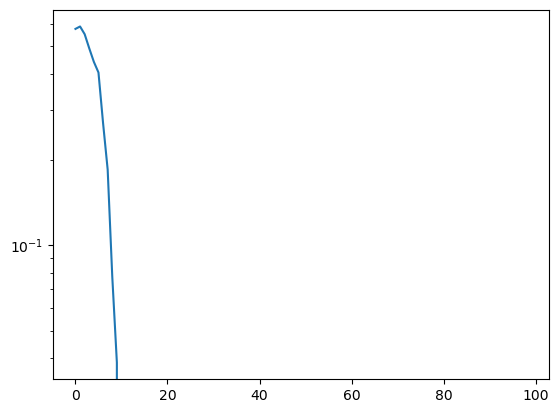

In [7]:
import matplotlib.pyplot as plt 
plt.yscale("log")
plt.plot(test[1])